# Proyecto Inteligencia Computacional 

In [2]:
import pandas as pd 
import numpy as np
import pyarrow.parquet as pq
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

feats = pd.read_parquet('./data/features.parquet') 
lcs = pd.read_parquet('./data/lcs.parquet') 
oids = pd.read_parquet('./data/oids.parquet')

In [3]:
# DataFrame con todas las features de cada objeto + la clase a la que pertenecen
df_feats_class = pd.merge(oids, feats, how="inner", on="oid", sort=True)

## Manejo de los Datos

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [5]:
# DataFrame con todas las features de cada objeto + la clase a la que pertenecen
df_feats_class = pd.merge(oids, feats, how="inner", on="oid", sort=True)
df_feats_for_forest = df_feats_class[df_feats_class.columns[1:]]
arr_class = df_feats_for_forest[df_feats_for_forest.columns[0]].values
df_feats_class

,oid,alerceclass,Q31_r,Rcs_r,Skew_r,SmallKurtosis_r,Std_r,StetsonK_r,Pvar_r,ExcessVar_r,...,max_diffmaglim_after_fid_g,median_diffmaglim_after_fid_g,delta_mag_fid_r,delta_mjd_fid_r,first_mag_r,mean_mag_r,min_mag_r,n_det_r,PercentAmplitude_r,Harmonics_mag_5_r
0,ZTF17aaaaafz,LPV,1.464396,0.215017,-0.173195,-0.741959,0.976239,0.900859,1.0,0.002542,...,20.823200,19.508801,4.200617,1339.718634,17.564814,18.677803,16.661703,628.0,0.112910,0.270302
1,ZTF17aaaaajg,RRL,0.366083,0.104706,0.405444,-1.552645,0.192603,0.883649,1.0,0.000132,...,21.066299,20.175400,0.580561,1251.693287,16.485819,16.641393,16.403305,320.0,0.027691,0.009083
2,ZTF17aaaaavq,LPV,2.839326,0.314243,0.001261,-1.538020,1.494441,0.800329,1.0,0.009013,...,21.126600,20.008301,5.057098,1434.977350,16.880259,15.694755,13.155277,656.0,0.180732,0.105483
3,ZTF17aaaacth,EB,0.029942,0.087856,2.875995,8.698949,0.476514,0.543303,1.0,0.000773,...,20.865801,19.922400,2.519390,1189.854849,16.813747,17.039993,16.799618,93.0,0.145533,0.028314
4,ZTF17aaaadmx,LPV,1.512813,0.298351,-0.484697,-0.732266,1.037921,0.791008,1.0,0.004826,...,20.916500,19.762699,5.000990,1338.672627,13.901798,14.856612,12.674696,479.0,0.172507,0.097117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,ZTF21abblixa,CEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.019199,19.309700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8415,ZTF21abbvvji,RRL,0.389800,0.259549,0.506888,-1.274300,0.202627,0.925235,1.0,0.000000,...,20.693900,20.560050,0.483679,28.936458,16.840920,17.002280,16.805649,8.0,0.024969,3.964182
8416,ZTF21abbzxoh,DSCT,0.457832,0.359654,0.324823,-1.448713,0.219106,0.893713,1.0,0.000203,...,20.815800,20.049101,0.595043,353.070185,15.650616,15.353477,15.068784,24.0,0.024223,2.072808
8417,ZTF21abcgftb,RRL,0.347692,0.136953,0.130523,-0.614194,0.192589,0.830999,1.0,0.000217,...,20.883900,20.081400,0.794328,375.932407,13.234352,13.045922,12.675948,24.0,0.034678,0.022427


In [6]:
# Suponiendo que 'feats' es tu DataFrame y 'target' es la columna de etiquetas
X_forest = df_feats_for_forest.drop(columns=['alerceclass'])  # Reemplaza 'target' con el nombre de tu columna de etiquetas
y_forest = df_feats_for_forest['alerceclass']  # Reemplaza 'target' con el nombre de tu columna de etiquetas

# Entrenar el modelo RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, 
                            criterion="gini",
                            max_features="sqrt",
                            bootstrap=True,
                            max_samples=2/3,
                            oob_score=True,
                            random_state=42
                            ,class_weight="balanced")
clf.fit(X_forest, y_forest)

# Obtener la importancia de las características
feature_importances = clf.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({
    'Feature': X_forest.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
115,Multiband_period_g_r,0.077157
117,Period_band_g,0.061812
119,Period_band_r,0.056347
48,g-r_mean_g_r,0.033195
49,g-r_max_corr_g_r,0.031238
...,...,...
27,SPM_tau_rise_r,0.000592
56,MHPS_PN_flag_g,0.000365
76,Pvar_g,0.000180
6,Pvar_r,0.000152


In [7]:
# Obtener la importancia de las características
feature_importances = clf.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
importance = pd.DataFrame({
    'Feature': X_forest.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
importance = importance.sort_values(by='Importance', ascending=False)

# Calcular la suma acumulada de importancia
importance['Cumulative Importance'] = importance['Importance'].cumsum()

# Encontrar la posición donde la suma acumulada alcanza
threshold_position = (importance['Cumulative Importance'] <= 0.75).sum()

# Mostrar la tabla y la posición
print(importance)
print(f"La suma acumulada alcanza el 75% en la posición: {threshold_position}")

                  Feature  Importance  Cumulative Importance
115  Multiband_period_g_r    0.077157               0.077157
117         Period_band_g    0.061812               0.138969
119         Period_band_r    0.056347               0.195316
48           g-r_mean_g_r    0.033195               0.228511
49       g-r_max_corr_g_r    0.031238               0.259749
..                    ...         ...                    ...
27         SPM_tau_rise_r    0.000592               0.999187
56         MHPS_PN_flag_g    0.000365               0.999552
76                 Pvar_g    0.000180               0.999732
6                  Pvar_r    0.000152               0.999884
61         MHPS_PN_flag_r    0.000116               1.000000

[178 rows x 3 columns]
La suma acumulada alcanza el 75% en la posición: 52


In [8]:
importance_df_ = importance_df[importance_df.columns[:-1]].head(52)
importance_arr = importance_df_["Feature"].values

df_feats_for_auto = df_feats_for_forest[importance_arr]
df_feats_for_auto.insert(0, "alerceclass", df_feats_for_forest['alerceclass'].values)
df_feats_for_auto

,alerceclass,Multiband_period_g_r,Period_band_g,Period_band_r,g-r_mean_g_r,g-r_max_corr_g_r,g-W2,g-r_mean_corr_g_r,GP_DRW_tau_g,g-r_max_g_r,...,MedianAbsDev_g,Amplitude_r,delta_mag_fid_r,iqr_g,Power_rate_2_g_r,Harmonics_mse_g,n_neg_r,Psi_CS_g,SF_ML_amplitude_g,n_det_g
0,LPV,0.998056,0.999001,0.998056,1.435857,1.250542,9.565536,1.535733,41.886814,1.060522,...,0.537737,1.760719,4.200617,1.151550,0.005793,1.082883,551.0,0.160312,2.436400,387.0
1,RRL,0.374650,0.374650,0.374650,-0.031629,0.082634,1.225796,0.098403,0.235621,-0.144400,...,0.148479,0.271345,0.580561,0.375387,0.031407,0.004386,134.0,0.416710,0.295651,233.0
2,LPV,275.362316,275.362316,275.362316,2.523045,2.055053,11.888458,2.705704,445.876352,1.993020,...,1.756824,2.278013,5.057098,3.859669,0.003611,0.134893,302.0,0.274040,11.396263,619.0
3,EB,0.109562,0.109562,0.842423,-0.251640,0.406408,2.677564,1.086571,0.113667,0.262726,...,0.434101,0.839141,2.519390,0.978395,0.020082,1.775440,15.0,0.343254,2.487437,22.0
4,LPV,0.498661,0.498661,0.498661,3.434069,3.137792,14.166490,3.518878,952.389572,2.788825,...,0.626677,1.745407,5.000990,1.258825,0.049548,0.899158,392.0,0.247893,4.454466,469.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,CEP,11.564211,11.564211,NaN,NaN,NaN,NaN,NaN,1.027615,NaN,...,0.143101,NaN,NaN,0.827574,0.000000,0.000048,NaN,0.293647,0.884662,17.0
8415,RRL,0.299751,0.299751,0.427716,-0.264118,-0.060133,0.748859,0.022580,0.065763,-0.449000,...,0.142511,0.241840,0.483679,0.533189,0.036893,0.000000,3.0,0.343403,0.240878,10.0
8416,DSCT,0.063881,0.073249,0.079062,0.493911,0.090625,1.412304,0.419827,0.114303,-0.179602,...,0.066546,0.290247,0.595043,0.329879,0.015249,0.001012,8.0,0.300656,0.361606,22.0
8417,RRL,0.357062,0.357062,0.357062,-0.127374,0.159251,1.051033,0.070111,0.356889,0.545899,...,0.149581,0.298825,0.794328,0.412966,0.001116,0.000560,12.0,0.330881,0.277380,38.0


In [9]:
df_feats_for_auto['oid'] = df_feats_class['oid']
df_feats_for_auto_no_oid = df_feats_for_auto.drop(columns=['oid'])

C:\Users\nicos\AppData\Local\Temp\ipykernel_13144\3508390410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feats_for_auto['oid'] = df_feats_class['oid']


In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample, shuffle

#Primero definimos un conjunto test balanceado con 60 elementos de cada clase
df_test = df_feats_for_auto.groupby('alerceclass').apply(lambda x: x.sample(n=50, random_state=42)).reset_index(drop=True)
df_test_no_oid = df_test.drop(columns=['oid'])
X_test = df_test_no_oid.drop(columns=['alerceclass'])
y_test = df_test_no_oid['alerceclass']

# Eliminar los elementos de df_test de df_feats_for_auto
df_auto = pd.concat([df_feats_for_auto,df_test]).drop_duplicates(keep=False)

df_val = df_auto.groupby('alerceclass').apply(lambda x: x.sample(n=80, random_state=42)).reset_index(drop=True)
df_val_no_oid = df_val.drop(columns=['oid'])
X_val = df_val_no_oid.drop(columns=['alerceclass'])
y_val = df_val_no_oid['alerceclass']

df_train = pd.concat([df_auto,df_val]).drop_duplicates(keep=False)
df_train_no_oid = df_train.drop(columns=['oid'])
X_train = df_train_no_oid.drop(columns=['alerceclass'])
y_train = df_train_no_oid['alerceclass']


#Imputar los NaN por el valor más frecuente en el conjunto de entrenamiento
imputer = SimpleImputer(strategy='most_frequent')
imputed_X_train = imputer.fit_transform(X_train)
imputed_X_val = imputer.transform(X_val)
imputed_X_test = imputer.transform(X_test)

# Normalizar los datos usando las constantes del conjunto de entrenamiento
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(imputed_X_train)
X_val = scaler.transform(imputed_X_val)
X_test = scaler.transform(imputed_X_test)

#Función para realizar upsampling
def upsample_data(X, y):
    df = pd.concat([pd.DataFrame(X), y.reset_index(drop=True)], axis=1)
    class_counts = y.value_counts()
    max_class_count = class_counts.max()
    
    df_upsampled = pd.DataFrame()
    for class_label in class_counts.index:
        df_class = df[df['alerceclass'] == class_label]
        df_class_upsampled = resample(df_class, 
                                      replace=True,  # Muestreo con reemplazo
                                      n_samples=max_class_count,  # Número de muestras igual a la clase mayoritaria
                                      random_state=42)
        df_upsampled = pd.concat([df_upsampled, df_class_upsampled], axis=0)
    
    df_upsampled = shuffle(df_upsampled, random_state=42)
    return df_upsampled.drop(columns=['alerceclass']).values, df_upsampled['alerceclass']

# Realizar upsampling en el conjunto de entrenamiento
X_train, y_train = upsample_data(scaled_X_train, y_train)


# Mostrar los resultados
print("Distribución de clases en el conjunto de entrenamiento:")
print(y_train.value_counts())
print("\nDistribución de clases en el conjunto de validación:")
print(y_val.value_counts())
print("\nDistribución de clases en el conjunto de prueba:")
print(y_test.value_counts())

Distribución de clases en el conjunto de entrenamiento:
alerceclass
RRL     2559
DSCT    2559
EB      2559
CEP     2559
LPV     2559
Name: count, dtype: int64

Distribución de clases en el conjunto de validación:
alerceclass
CEP     80
DSCT    80
EB      80
LPV     80
RRL     80
Name: count, dtype: int64

Distribución de clases en el conjunto de prueba:
alerceclass
CEP     50
DSCT    50
EB      50
LPV     50
RRL     50
Name: count, dtype: int64


C:\Users\nicos\AppData\Local\Temp\ipykernel_13144\2428626423.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_test = df_feats_for_auto.groupby('alerceclass').apply(lambda x: x.sample(n=50, random_state=42)).reset_index(drop=True)
C:\Users\nicos\AppData\Local\Temp\ipykernel_13144\2428626423.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_val = df_auto.groupby('alerceclass').apply(lambda x: x.sa

# GMM

In [11]:
from keras.models import Model, load_model, Sequential
from keras.layers import Input, Dense
from keras.optimizers import SGD
from keras.optimizers import Adam , Nadam
from keras.optimizers import RMSprop
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from torch import nn
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)


# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
y_val_tensor = torch.tensor(y_val_encoded, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

# Create DataLoader for training and validation sets
train_dataset_autoencoder = TensorDataset(X_train_tensor, X_train_tensor)
val_dataset_autoencoder = TensorDataset(X_val_tensor, X_val_tensor)
test_dataset_autoencoder = TensorDataset(X_test_tensor, X_test_tensor)


class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 60),  
            nn.SELU(),          
            nn.Linear(60, 55),
            nn.SELU(),
            nn.Linear(55, 50),
            nn.SELU(),
            nn.Linear(50, 45),         
            nn.SELU(),
            nn.Linear(45, 40),         
            nn.SELU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(40, 45), ##
            nn.SELU(),
            nn.Linear(45, 50),  ##
            nn.SELU(),
            nn.Linear(50, 55),  ##
            nn.SELU(),
            nn.Linear(55, 60),  ##
            nn.SELU(),
            nn.Linear(60, input_dim)  ##
        )  

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def get_latent_representation(self, x):
        """Returns the latent representation (encoded space)."""
        with torch.no_grad():
            return self.encoder(x)

In [20]:
lr = 0.0001
batch_size = 64
# criterion = nn.MSELoss()
criterion = nn.L1Loss()  # Mean Absolute Error
early_stopping_tolerance = 10
epochs = 100

curves_autoencoder = {
    "train_loss": [],
    "val_loss": []
}

input_dim = X_train_tensor.shape[1]
autoencoder = Autoencoder(input_dim)

optimizer = optim.Adam(autoencoder.parameters(), lr=lr, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5) # Reduce the learning rate by half every 20 epochs

for epoch in range(epochs):
    autoencoder.train()
    running_loss_train = 0.0
    for inputs, _ in DataLoader(train_dataset_autoencoder, batch_size=batch_size, shuffle=True):
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss_train = criterion(outputs, inputs)
        loss_train.backward()
        optimizer.step()
        running_loss_train += loss_train.item() * inputs.size(0)
    epoch_loss_train = running_loss_train / len(train_dataset_autoencoder)
    curves_autoencoder["train_loss"].append(epoch_loss_train)
    print(f"Epoch {epoch + 1}/{epochs} - Train Loss: {epoch_loss_train}")

    #validamos modelo
    autoencoder.eval()
    running_loss_val = 0.0
    with torch.no_grad():
        for inputs, _ in DataLoader(val_dataset_autoencoder, batch_size=batch_size, shuffle=False):
            outputs = autoencoder(inputs)
            loss_val = criterion(outputs, inputs)
            running_loss_val += loss_val.item() * inputs.size(0)
        epoch_loss_val = running_loss_val / len(val_dataset_autoencoder)
        curves_autoencoder["val_loss"].append(epoch_loss_val)
        print(f"Epoch {epoch + 1}/{epochs} - Val Loss: {epoch_loss_val}")

Epoch 1/100 - Train Loss: 0.5285124296739541
Epoch 1/100 - Val Loss: 0.45685055732727053
Epoch 2/100 - Train Loss: 0.42449302180710596
Epoch 2/100 - Val Loss: 0.4006942975521088
Epoch 3/100 - Train Loss: 0.3888777456231395
Epoch 3/100 - Val Loss: 0.3739262044429779
Epoch 4/100 - Train Loss: 0.36408479806267224
Epoch 4/100 - Val Loss: 0.34784326672554017
Epoch 5/100 - Train Loss: 0.34066230632123096
Epoch 5/100 - Val Loss: 0.3303888541460037
Epoch 6/100 - Train Loss: 0.3255274963849408
Epoch 6/100 - Val Loss: 0.31794795334339143
Epoch 7/100 - Train Loss: 0.31115375003483015
Epoch 7/100 - Val Loss: 0.3044707626104355
Epoch 8/100 - Train Loss: 0.3000171701858732
Epoch 8/100 - Val Loss: 0.29614938616752623
Epoch 9/100 - Train Loss: 0.2935489394763523
Epoch 9/100 - Val Loss: 0.2905297255516052
Epoch 10/100 - Train Loss: 0.2885978831915056
Epoch 10/100 - Val Loss: 0.28595447421073916
Epoch 11/100 - Train Loss: 0.28414233980722936
Epoch 11/100 - Val Loss: 0.2817156183719635
Epoch 12/100 - Tra

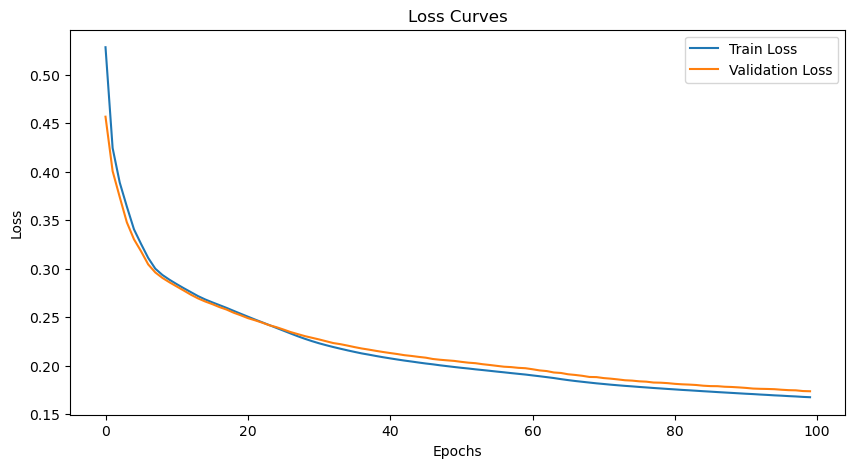

In [21]:
# Plotear las curvas de pérdida
plt.figure(figsize=(10, 5))
plt.plot(curves_autoencoder["train_loss"], label='Train Loss')
plt.plot(curves_autoencoder["val_loss"], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

In [22]:
# Pasar los datos de prueba por el encoder para obtener las representaciones latentes
test_loader = DataLoader(test_dataset_autoencoder, batch_size=batch_size, shuffle=False)
latent_representations = []

autoencoder.eval()  # Cambiar a modo evaluación
with torch.no_grad():
    for inputs, _ in test_loader:
        latents = autoencoder.get_latent_representation(inputs)
        latent_representations.append(latents)

# Combinar todas las representaciones latentes en un solo tensor
latent_representations = torch.cat(latent_representations).numpy()

In [23]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Aplicar GMM
n_clusters = len(np.unique(y_test_encoded))  # Número de clases reales
#gmm = GaussianMixture(n_components=5, random_state=42, init_params='kmeans')
gmm = GaussianMixture(n_components=5, n_init=5, covariance_type='diag', random_state=42)
gmm_labels = gmm.fit_predict(latent_representations)

# Evaluar Clustering
ari = adjusted_rand_score(y_test_encoded, gmm_labels)
silhouette = silhouette_score(latent_representations, gmm_labels)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")


Adjusted Rand Index (ARI): 0.2531
Silhouette Score: 0.2455


c:\Users\nicos\.conda\envs\env_inteligencia\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nicos\.conda\envs\env_inteligencia\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nicos\.conda\envs\env_inteligencia\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nicos\.conda\envs\env_inteligencia\Lib\site-packages\sklearn\cluster\_

In [24]:
# Obtener nombres de las clases originales usando LabelEncoder
class_names = label_encoder.inverse_transform(np.unique(y_test_encoded))
# Crear un diccionario que mapea clusters a nombres de clases
cluster_to_class = {cluster: class_name for cluster, class_name in zip(np.unique(gmm_labels), class_names)}

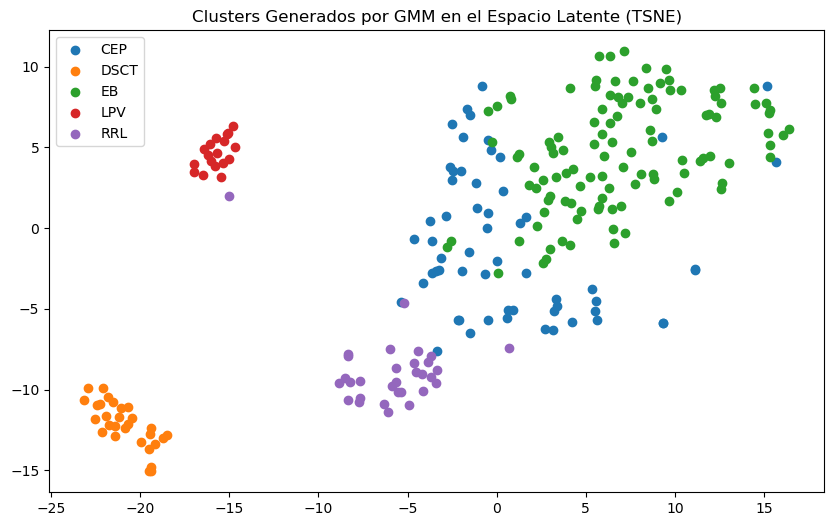

In [25]:
from sklearn.manifold import TSNE

# Reducir a 2 dimensiones con t-SNE
tsne = TSNE(n_components=2, random_state=42)
latent_2d = tsne.fit_transform(latent_representations)

plt.figure(figsize=(10, 6))
for cluster in np.unique(gmm_labels):
    cluster_points = latent_2d[gmm_labels == cluster]
    class_name = cluster_to_class[cluster]  # Nombre de la clase
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"{class_name}")  # Usa el nombre
plt.legend()
plt.title("Clusters Generados por GMM en el Espacio Latente (TSNE)")
plt.show()

c:\Users\nicos\.conda\envs\env_inteligencia\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\nicos\.conda\envs\env_inteligencia\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


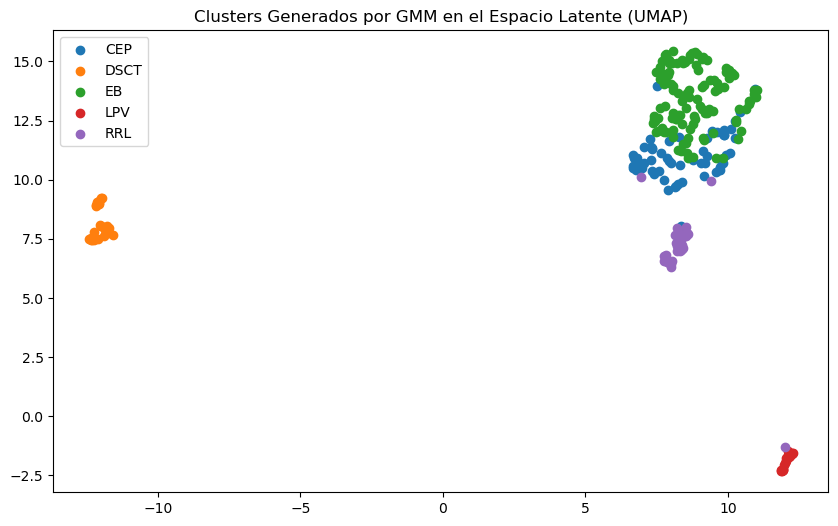

In [26]:
import umap
import matplotlib.pyplot as plt
import numpy as np

# Reducir a 2 dimensiones con UMAP
umap_reducer = umap.UMAP(n_components=2, n_neighbors=10, random_state=42)
latent_2d_umap = umap_reducer.fit_transform(latent_representations)

plt.figure(figsize=(10, 6))
for cluster in np.unique(gmm_labels):
    cluster_points = latent_2d_umap[gmm_labels == cluster]
    class_name = cluster_to_class[cluster]  
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"{class_name}")  # Usa el nombre
plt.legend()
plt.title("Clusters Generados por GMM en el Espacio Latente (UMAP)")
plt.show()

Número de anomalías detectadas: 11
Número de puntos normales: 239


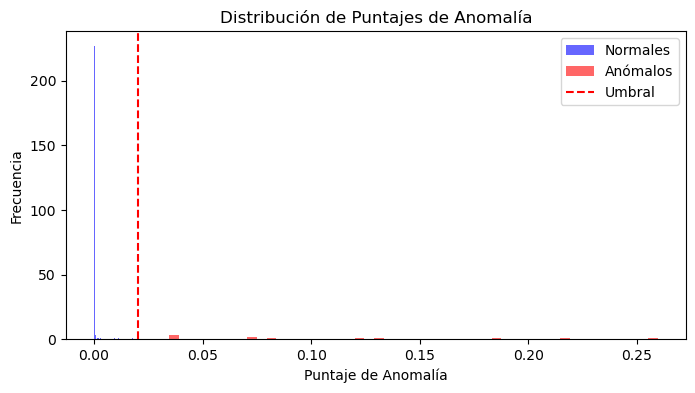

In [27]:
# Obtener las probabilidades de pertenencia a cada cluster
probs = gmm.predict_proba(latent_representations)

# Calcular los puntajes de anomalía
anomaly_scores_gmm = 1 - probs.max(axis=1)

# Definir un umbral para clasificar anomalías
threshold = 0.02  # Ajusta este valor según la distribución de tus datos

# Clasificar como anómalos (True para anomalías, False para normales)
anomaly_predictions_gmm = anomaly_scores_gmm > threshold

# Mostrar resultados
print("Número de anomalías detectadas:", np.sum(anomaly_predictions_gmm))
print("Número de puntos normales:", len(anomaly_scores_gmm) - np.sum(anomaly_predictions_gmm))

# Graficar histogramas de puntajes de anomalía
plt.figure(figsize=(8, 4))
plt.hist(anomaly_scores_gmm[~anomaly_predictions_gmm], bins=50, alpha=0.6, label="Normales", color='blue')
plt.hist(anomaly_scores_gmm[anomaly_predictions_gmm], bins=50, alpha=0.6, label="Anómalos", color='red')
plt.axvline(threshold, color='red', linestyle='dashed', label="Umbral")
plt.xlabel("Puntaje de Anomalía")
plt.ylabel("Frecuencia")
plt.legend()
plt.title("Distribución de Puntajes de Anomalía")
plt.show()

In [26]:
# Crear un DataFrame con los datos de prueba, los puntajes y las predicciones
df_test_gmm = pd.DataFrame({
    'oid': df_test['oid'],  # Sustituye con la columna que contiene los IDs únicos de tus objetos 
    'anomaly_score': anomaly_scores_gmm,
    'is_anomaly': anomaly_predictions_gmm,
    'class': y_test
})

# Filtrar solo las anomalías
anomalies_gmm = df_test_gmm[df_test_gmm['is_anomaly'] == True]

# Seleccionar las 5 anomalías con mayor puntaje
top_5_anomalies_gmm = anomalies_gmm.nlargest(5, 'anomaly_score')
print("Top 5 anomalías:")
print(top_5_anomalies_gmm)

Top 5 anomalías:
              oid  anomaly_score  is_anomaly class
84   ZTF18aaabbjd       0.352033        True  DSCT
117  ZTF18abfktyv       0.288272        True    EB
40   ZTF18abfnktc       0.096945        True   CEP
101  ZTF18abumexm       0.083346        True    EB
202  ZTF18abadjjv       0.055128        True   RRL


In [27]:
# Asegúrate de que df_test contenga las IDs de los objetos y las features originales
df_test_gmm['anomaly_score'] = anomaly_scores_gmm  # Puntajes de anomalía calculados con GMM
df_test_gmm['is_anomaly'] = anomaly_predictions_gmm  # Predicciones de anomalía (True/False)

# Mostrar solo las anomalías
anomalies_gmm = df_test_gmm[df_test_gmm['is_anomaly'] == True]
print("Objetos anómalos detectados:")
anomalies_gmm

Objetos anómalos detectados:


,oid,anomaly_score,is_anomaly,class
4,ZTF17aacpchm,0.013830,True,CEP
27,ZTF18abcwdvw,0.017215,True,CEP
40,ZTF18abfnktc,0.096945,True,CEP
84,ZTF18aaabbjd,0.352033,True,DSCT
101,ZTF18abumexm,0.083346,True,EB
113,ZTF17aaafizv,0.031572,True,EB
117,ZTF18abfktyv,0.288272,True,EB
202,ZTF18abadjjv,0.055128,True,RRL


## Curvas de luz

### CEP

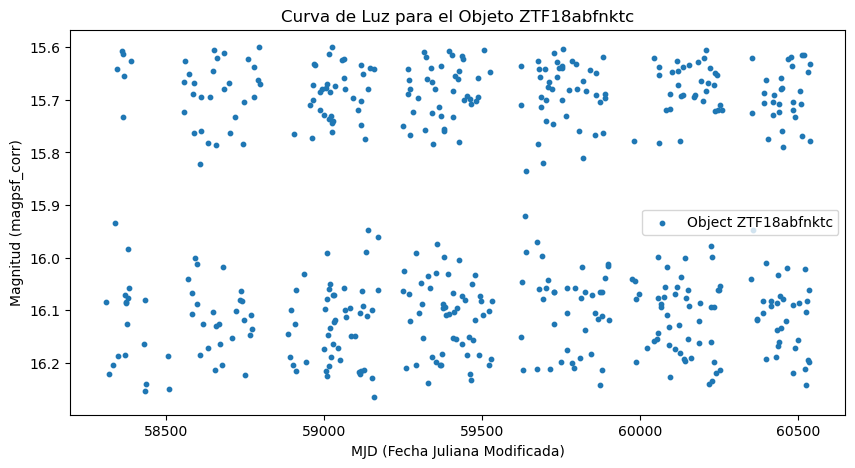

In [12]:
oid = "ZTF18abfnktc"

# Filtrar el dataframe para el objeto actual
star_data = lcs[lcs['oid'] == oid]

# Columnas de tiempo y magnitud
time = star_data['mjd']
magnitude = star_data['magpsf_corr']  # 'magpsf': Sin correxión

# Curva de luz
plt.figure(figsize=(10, 5))
plt.scatter(time, magnitude, s=10, label=f"Object {oid}")
plt.xlabel('MJD (Fecha Juliana Modificada)')
plt.ylabel('Magnitud (magpsf_corr)')
plt.title(f'Curva de Luz para el Objeto {oid}')
plt.gca().invert_yaxis()  # Las magnitudes son inversas (más bajo es más brillante)
plt.legend()
plt.show()

C:\Users\nicos\AppData\Local\Temp\ipykernel_13144\938538617.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
C:\Users\nicos\AppData\Local\Temp\ipykernel_13144\938538617.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1


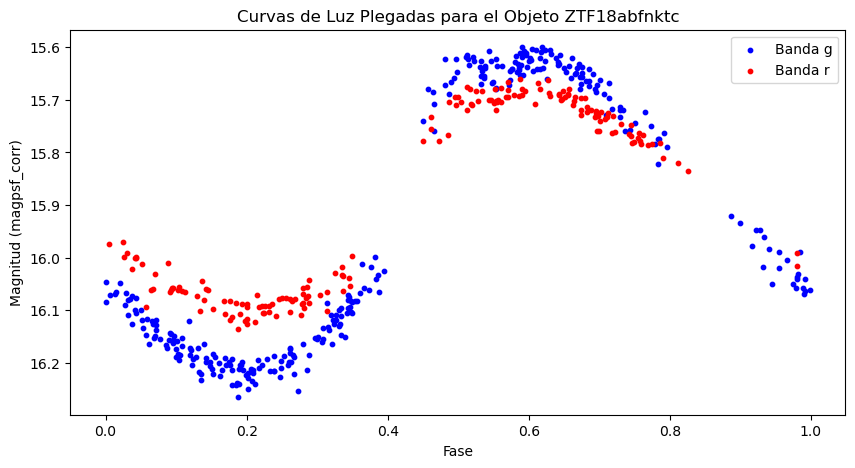

In [13]:
# Fusionar los DataFrames en base a la columna 'oid'
df_merged = pd.merge(lcs, feats[['oid', 'Multiband_period_g_r', 'Period_band_g', 'Period_band_r']], on='oid', how='left')

# Seleccionar el 'oid' del objeto que deseas analizar
oid_interes = 'ZTF18abfnktc'

# Filtrar los datos para el 'oid' seleccionado
datos_estrella = df_merged[df_merged['oid'] == oid_interes]

# Verificar que hay datos disponibles para el 'oid' seleccionado
if not datos_estrella.empty:
    # Calcular la fase para cada observación
    mjd_0 = datos_estrella['mjd'].min()  # Época de referencia

    # Crear una columna de fase para cada banda
    datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
    datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1

    # Filtrar por banda utilizando 'fid' (1 para g, 2 para r)
    datos_g = datos_estrella[datos_estrella['fid'] == 1]
    datos_r = datos_estrella[datos_estrella['fid'] == 2]

    # Graficar las curvas de luz plegadas
    plt.figure(figsize=(10, 5))
    if not datos_g.empty:
        plt.scatter(datos_g['fase_g'], datos_g['magpsf_corr'], s=10, color='blue', label='Banda g')
    if not datos_r.empty:
        plt.scatter(datos_r['fase_r'], datos_r['magpsf_corr'], s=10, color='red', label='Banda r')
    plt.xlabel('Fase')
    plt.ylabel('Magnitud (magpsf_corr)')
    plt.title(f'Curvas de Luz Plegadas para el Objeto {oid_interes}')
    plt.gca().invert_yaxis()  # Las magnitudes son inversas
    plt.legend()
    plt.show()
else:
    print(f"No se encontraron datos para el objeto con oid {oid_interes}.")

### DSCT

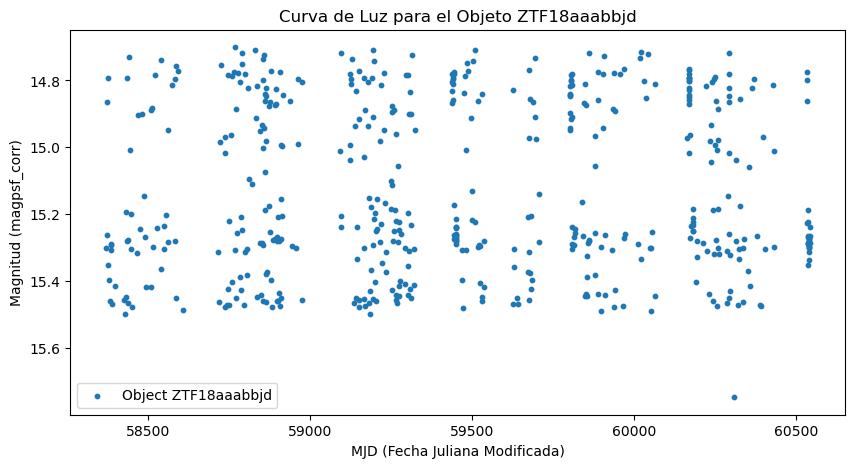

In [14]:
oid = "ZTF18aaabbjd"

# Filtrar el dataframe para el objeto actual
star_data = lcs[lcs['oid'] == oid]

# Columnas de tiempo y magnitud
time = star_data['mjd']
magnitude = star_data['magpsf_corr']  # 'magpsf': Sin correxión

# Curva de luz
plt.figure(figsize=(10, 5))
plt.scatter(time, magnitude, s=10, label=f"Object {oid}")
plt.xlabel('MJD (Fecha Juliana Modificada)')
plt.ylabel('Magnitud (magpsf_corr)')
plt.title(f'Curva de Luz para el Objeto {oid}')
plt.gca().invert_yaxis()  # Las magnitudes son inversas (más bajo es más brillante)
plt.legend()
plt.show()

C:\Users\nicos\AppData\Local\Temp\ipykernel_13144\4262460323.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
C:\Users\nicos\AppData\Local\Temp\ipykernel_13144\4262460323.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1


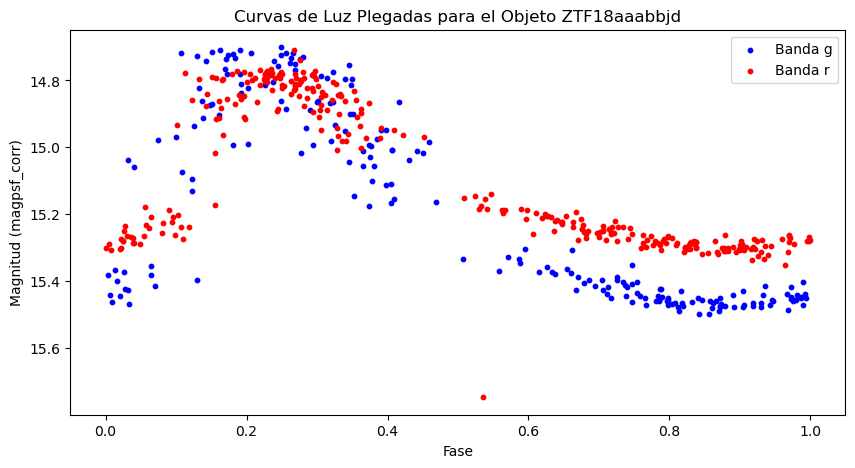

In [15]:
# Fusionar los DataFrames en base a la columna 'oid'
df_merged = pd.merge(lcs, feats[['oid', 'Multiband_period_g_r', 'Period_band_g', 'Period_band_r']], on='oid', how='left')

# Seleccionar el 'oid' del objeto que deseas analizar
oid_interes = 'ZTF18aaabbjd'

# Filtrar los datos para el 'oid' seleccionado
datos_estrella = df_merged[df_merged['oid'] == oid_interes]

# Verificar que hay datos disponibles para el 'oid' seleccionado
if not datos_estrella.empty:
    # Calcular la fase para cada observación
    mjd_0 = datos_estrella['mjd'].min()  # Época de referencia

    # Crear una columna de fase para cada banda
    datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
    datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1

    # Filtrar por banda utilizando 'fid' (1 para g, 2 para r)
    datos_g = datos_estrella[datos_estrella['fid'] == 1]
    datos_r = datos_estrella[datos_estrella['fid'] == 2]

    # Graficar las curvas de luz plegadas
    plt.figure(figsize=(10, 5))
    if not datos_g.empty:
        plt.scatter(datos_g['fase_g'], datos_g['magpsf_corr'], s=10, color='blue', label='Banda g')
    if not datos_r.empty:
        plt.scatter(datos_r['fase_r'], datos_r['magpsf_corr'], s=10, color='red', label='Banda r')
    plt.xlabel('Fase')
    plt.ylabel('Magnitud (magpsf_corr)')
    plt.title(f'Curvas de Luz Plegadas para el Objeto {oid_interes}')
    plt.gca().invert_yaxis()  # Las magnitudes son inversas
    plt.legend()
    plt.show()
else:
    print(f"No se encontraron datos para el objeto con oid {oid_interes}.")

### RRL

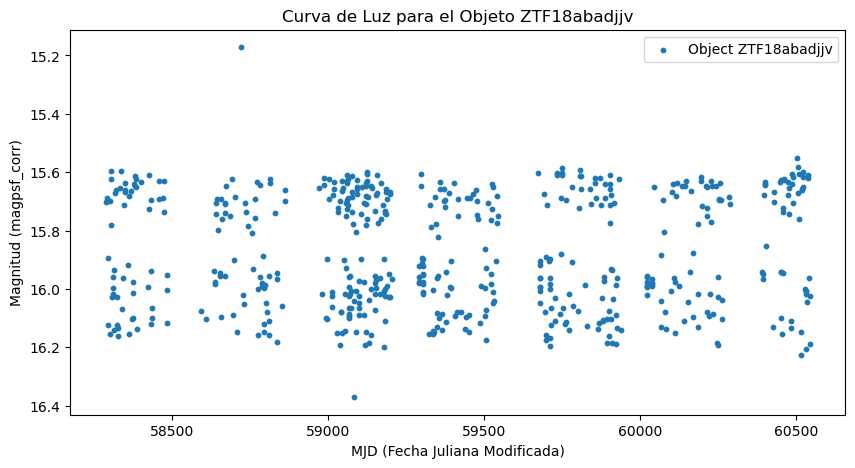

In [16]:
oid = "ZTF18abadjjv"

# Filtrar el dataframe para el objeto actual
star_data = lcs[lcs['oid'] == oid]

# Columnas de tiempo y magnitud
time = star_data['mjd']
magnitude = star_data['magpsf_corr']  # 'magpsf': Sin correxión

# Curva de luz
plt.figure(figsize=(10, 5))
plt.scatter(time, magnitude, s=10, label=f"Object {oid}")
plt.xlabel('MJD (Fecha Juliana Modificada)')
plt.ylabel('Magnitud (magpsf_corr)')
plt.title(f'Curva de Luz para el Objeto {oid}')
plt.gca().invert_yaxis()  # Las magnitudes son inversas (más bajo es más brillante)
plt.legend()
plt.show()

C:\Users\nicos\AppData\Local\Temp\ipykernel_13144\3417343765.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
C:\Users\nicos\AppData\Local\Temp\ipykernel_13144\3417343765.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1


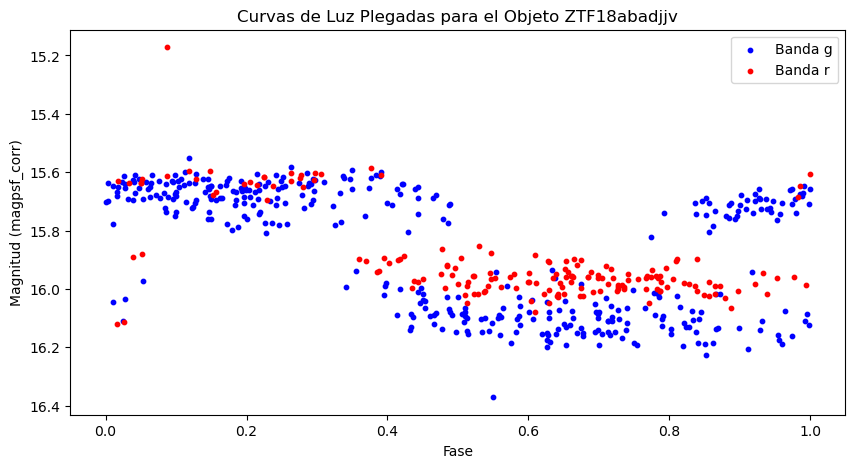

In [17]:
# Fusionar los DataFrames en base a la columna 'oid'
df_merged = pd.merge(lcs, feats[['oid', 'Multiband_period_g_r', 'Period_band_g', 'Period_band_r']], on='oid', how='left')

# Seleccionar el 'oid' del objeto que deseas analizar
oid_interes = "ZTF18abadjjv"

# Filtrar los datos para el 'oid' seleccionado
datos_estrella = df_merged[df_merged['oid'] == oid_interes]

# Verificar que hay datos disponibles para el 'oid' seleccionado
if not datos_estrella.empty:
    # Calcular la fase para cada observación
    mjd_0 = datos_estrella['mjd'].min()  # Época de referencia

    # Crear una columna de fase para cada banda
    datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
    datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1

    # Filtrar por banda utilizando 'fid' (1 para g, 2 para r)
    datos_g = datos_estrella[datos_estrella['fid'] == 1]
    datos_r = datos_estrella[datos_estrella['fid'] == 2]

    # Graficar las curvas de luz plegadas
    plt.figure(figsize=(10, 5))
    if not datos_g.empty:
        plt.scatter(datos_g['fase_g'], datos_g['magpsf_corr'], s=10, color='blue', label='Banda g')
    if not datos_r.empty:
        plt.scatter(datos_r['fase_r'], datos_r['magpsf_corr'], s=10, color='red', label='Banda r')
    plt.xlabel('Fase')
    plt.ylabel('Magnitud (magpsf_corr)')
    plt.title(f'Curvas de Luz Plegadas para el Objeto {oid_interes}')
    plt.gca().invert_yaxis()  # Las magnitudes son inversas
    plt.legend()
    plt.show()
else:
    print(f"No se encontraron datos para el objeto con oid {oid_interes}.")

### EB

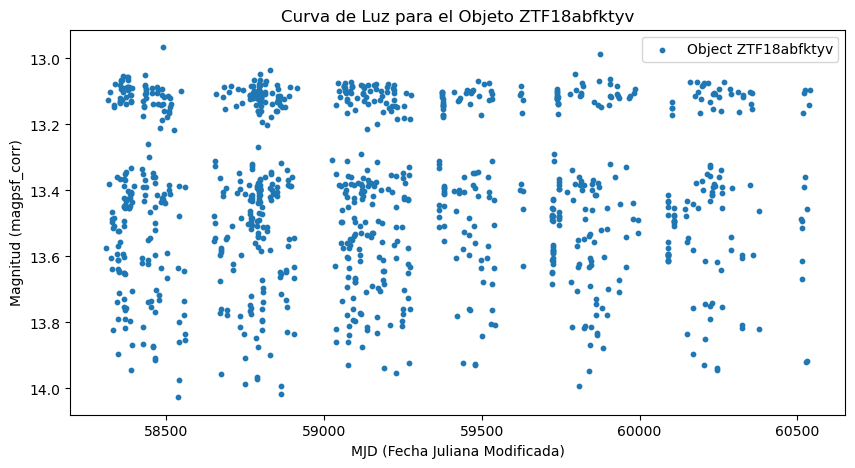

In [18]:
oid = "ZTF18abfktyv"

# Filtrar el dataframe para el objeto actual
star_data = lcs[lcs['oid'] == oid]

# Columnas de tiempo y magnitud
time = star_data['mjd']
magnitude = star_data['magpsf_corr']  # 'magpsf': Sin correxión

# Curva de luz
plt.figure(figsize=(10, 5))
plt.scatter(time, magnitude, s=10, label=f"Object {oid}")
plt.xlabel('MJD (Fecha Juliana Modificada)')
plt.ylabel('Magnitud (magpsf_corr)')
plt.title(f'Curva de Luz para el Objeto {oid}')
plt.gca().invert_yaxis()  # Las magnitudes son inversas (más bajo es más brillante)
plt.legend()
plt.show()

C:\Users\nicos\AppData\Local\Temp\ipykernel_13144\1938075730.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
C:\Users\nicos\AppData\Local\Temp\ipykernel_13144\1938075730.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1


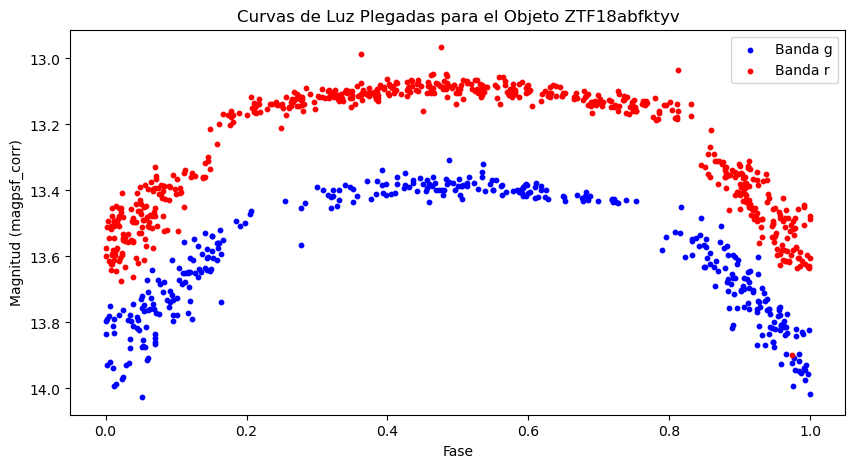

In [19]:
# Fusionar los DataFrames en base a la columna 'oid'
df_merged = pd.merge(lcs, feats[['oid', 'Multiband_period_g_r', 'Period_band_g', 'Period_band_r']], on='oid', how='left')

# Seleccionar el 'oid' del objeto que deseas analizar
oid_interes = "ZTF18abfktyv"

# Filtrar los datos para el 'oid' seleccionado
datos_estrella = df_merged[df_merged['oid'] == oid_interes]

# Verificar que hay datos disponibles para el 'oid' seleccionado
if not datos_estrella.empty:
    # Calcular la fase para cada observación
    mjd_0 = datos_estrella['mjd'].min()  # Época de referencia

    # Crear una columna de fase para cada banda
    datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
    datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1

    # Filtrar por banda utilizando 'fid' (1 para g, 2 para r)
    datos_g = datos_estrella[datos_estrella['fid'] == 1]
    datos_r = datos_estrella[datos_estrella['fid'] == 2]

    # Graficar las curvas de luz plegadas
    plt.figure(figsize=(10, 5))
    if not datos_g.empty:
        plt.scatter(datos_g['fase_g'], datos_g['magpsf_corr'], s=10, color='blue', label='Banda g')
    if not datos_r.empty:
        plt.scatter(datos_r['fase_r'], datos_r['magpsf_corr'], s=10, color='red', label='Banda r')
    plt.xlabel('Fase')
    plt.ylabel('Magnitud (magpsf_corr)')
    plt.title(f'Curvas de Luz Plegadas para el Objeto {oid_interes}')
    plt.gca().invert_yaxis()  # Las magnitudes son inversas
    plt.legend()
    plt.show()
else:
    print(f"No se encontraron datos para el objeto con oid {oid_interes}.")